In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
caminho_2019 = "..\dados\obitos-2019.csv"
caminho_2020 = "..\dados\obitos-2020.csv"
caminho_2021 = "..\dados\obitos-2021.csv"

In [16]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)
dados_2021 = pd.read_csv(caminho_2021)

In [17]:
print(f"Dados 2019: {dados_2019.shape}")
print(f"Dados 2020: {dados_2020.shape}")
print(f"Dados 2021: {dados_2021.shape}")

Dados 2019: (12450, 6)
Dados 2020: (15030, 6)
Dados 2021: (9790, 6)


In [18]:
dados_2019.head(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [19]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2019

,total
tipo_doenca,
INDETERMINADA,7028
INSUFICIENCIA_RESPIRATORIA,101113
OUTRAS,663781
PNEUMONIA,227002
SEPTICEMIA,176131
SRAG,1504


In [9]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020


,total
tipo_doenca,
COVID,197297
INDETERMINADA,9801
INSUFICIENCIA_RESPIRATORIA,99800
OUTRAS,696973
PNEUMONIA,183291
SEPTICEMIA,163978
SRAG,16683


In [10]:
total_obitos_2021 = dados_2021.groupby("tipo_doenca").sum()
total_obitos_2021

,total
tipo_doenca,
COVID,87234
INDETERMINADA,2079
INSUFICIENCIA_RESPIRATORIA,18070
OUTRAS,134358
PNEUMONIA,33106
SEPTICEMIA,32507
SRAG,3134


In [12]:
def grafico_comparativo(causa="COVID", uf="Brasil"):

    if uf == "Brasil":
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        total_2021 = dados_2021.groupby("tipo_doenca").sum()
    
        if causa == "COVID":
            total_2019 = 0        
            lista = [total_2019, int(total_2020.loc[causa]), int(total_2021.loc[causa])]

        else:
            total_2019 = dados_2019.groupby("tipo_doenca").sum()   
            lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa]), int(total_2021.loc[causa])]

    else:
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        total_2021 = dados_2021.groupby(["uf", "tipo_doenca"]).sum()
    
        if causa == "COVID":
            total_2019 = 0        
            lista = [total_2019, int(total_2020.loc[uf, "COVID"]), int(total_2021.loc[uf, "COVID"])]
        else:
            total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()   
            lista = [int(total_2019.loc[uf, causa]), int(total_2020.loc[uf, causa]), int(total_2021.loc[uf, causa])]
        

    dados = pd.DataFrame({"Total": lista, "Ano": [2019, 2020, 2021]})

    plt.figure(figsize=(10,6))
    plt.title(f"Total de óbitos por {causa} - {uf}", fontsize=18, fontweight="bold")
    sns.barplot(x="Ano", y="Total", data=dados)
    plt.xlabel("Ano", fontsize=16, fontweight="bold")
    plt.ylabel("Óbitos", fontsize=16, fontweight="bold")

    

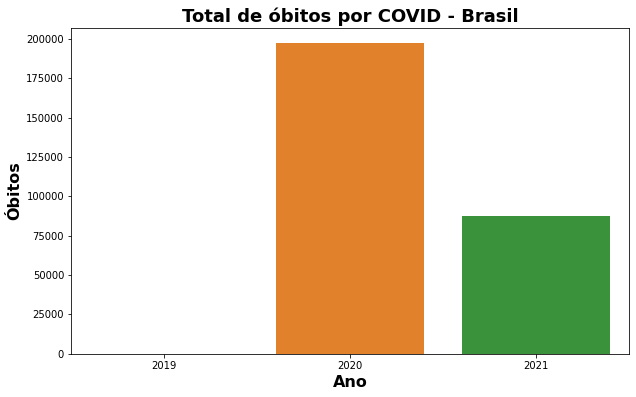

In [13]:
grafico_comparativo()